In [2]:
import pandas as pd

df = pd.read_csv('./titanic/train.csv')

In [3]:
print(df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
plt.figure(figsize = (12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [7]:
colormap = plt.cm.gist_heat

In [8]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

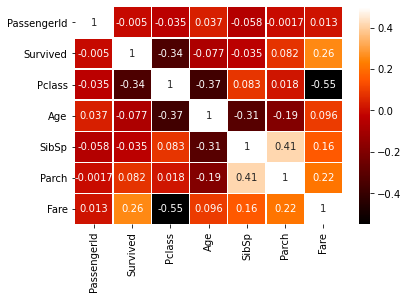

In [9]:
sb.heatmap(df.corr(), linewidths=0.2, vmax=0.5, cmap=colormap, linecolor = 'white', annot=True)

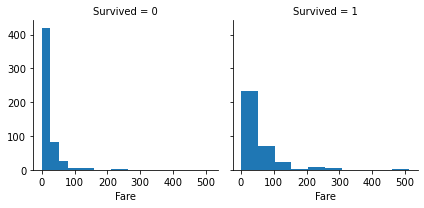

In [10]:
grid = sb.FacetGrid(df, col='Survived')
grid.map(plt.hist, 'Fare', bins = 10)
plt.show()

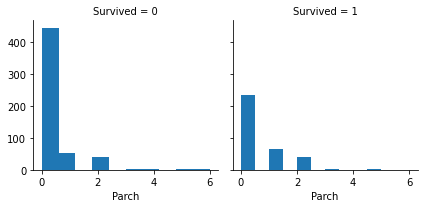

In [11]:
grid = sb.FacetGrid(df, col='Survived')
grid.map(plt.hist, 'Parch', bins = 10)
plt.show()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

In [13]:
df = pd.read_csv('./titanic/train.csv')
df2 = pd.read_csv('./titanic/test.csv')
df.fillna({'Embarked':df['Embarked'].mode()[0],'Age':int(df['Age'].mean())},inplace=True)
df2.fillna({'Embarked':df2['Embarked'].mode()[0],'Age':int(df2['Age'].mean())},inplace=True)
df=df.drop('Cabin', axis=1)
df2=df2.drop('Cabin', axis=1)
df=df.drop('Pclass', axis=1)
df2=df2.drop('Pclass', axis=1)
df=df.drop('Name', axis=1)
df2=df2.drop('Name', axis=1)
df=df.drop('PassengerId', axis=1)
df2=df2.drop('PassengerId', axis=1)
df=df.drop('Ticket', axis=1)
df2=df2.drop('Ticket', axis=1)

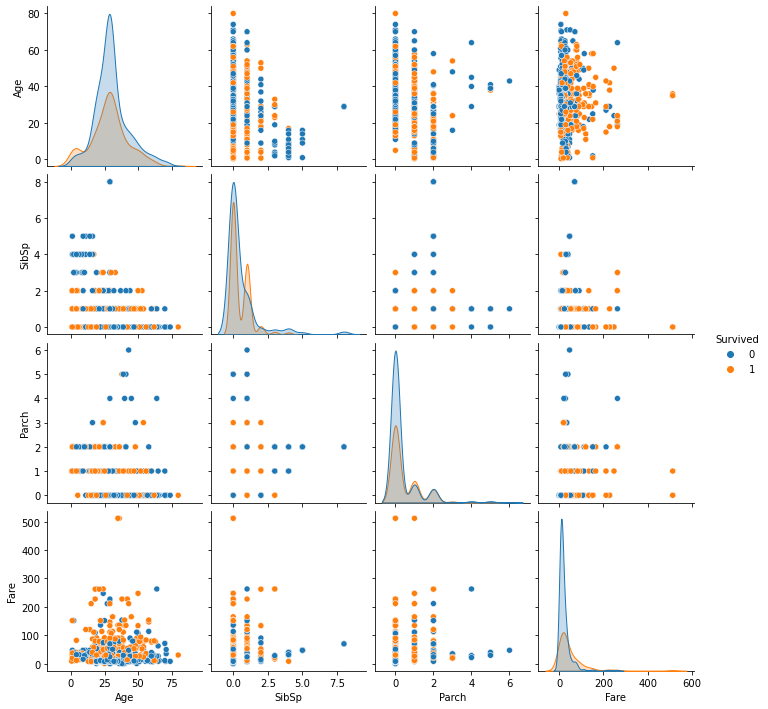

In [14]:
import seaborn as sns

sns.pairplot(df, hue='Survived');
plt.show()

In [15]:
Data_set = df.values
Data_set2 = df2.values

X= Data_set[:,1:7]
X2= Data_set2[:,0:6]
Y= Data_set[:,0]

In [16]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,1,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,0,male,35.0,0,0,8.0500,S


In [17]:
from sklearn.preprocessing import LabelEncoder

N0 = X[:,0]
e = LabelEncoder()
e.fit(N0)
M0 = e.transform(N0)
X[:,0]=M0

N5 = X[:,5]
e = LabelEncoder()
e.fit(N5)
M5 = e.transform(N5)
X[:,5]=M5

N0_ = X2[:,0]
e = LabelEncoder()
e.fit(N0_)
M0_ = e.transform(N0_)
X2[:,0]=M0_

N5_ = X2[:,5]
e = LabelEncoder()
e.fit(N5_)
M5_ = e.transform(N5_)
X2[:,5]=M5_


T=X.astype(float)
P=Y.astype(int)

T2=X2.astype(float)

In [25]:
model = Sequential()
model.add(Dense(30, input_dim=6, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

model.fit(T, P, epochs=200, batch_size=10)

Epoch 1/200
90/90 [==============================] - 1s 705us/step - loss: 2.2568 - accuracy: 0.6160
Epoch 2/200
90/90 [==============================] - 0s 817us/step - loss: 0.6021 - accuracy: 0.6777
Epoch 3/200
90/90 [==============================] - 0s 795us/step - loss: 0.6029 - accuracy: 0.7003
Epoch 4/200
90/90 [==============================] - 0s 795us/step - loss: 0.6950 - accuracy: 0.6901
Epoch 5/200
90/90 [==============================] - 0s 806us/step - loss: 0.5686 - accuracy: 0.6898
Epoch 6/200
90/90 [==============================] - 0s 829us/step - loss: 0.5610 - accuracy: 0.7060
Epoch 7/200
90/90 [==============================] - 0s 873us/step - loss: 0.5545 - accuracy: 0.7272
Epoch 8/200
90/90 [==============================] - 0s 873us/step - loss: 0.5183 - accuracy: 0.7398
Epoch 9/200
90/90 [==============================] - 0s 918us/step - loss: 0.5067 - accuracy: 0.7616
Epoch 10/200
90/90 [==============================] - 0s 993us/step - loss: 0.5108 - accura

90/90 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.8010
Epoch 82/200
90/90 [==============================] - 0s 849us/step - loss: 0.4562 - accuracy: 0.7993
Epoch 83/200
90/90 [==============================] - 0s 851us/step - loss: 0.4696 - accuracy: 0.7958
Epoch 84/200
90/90 [==============================] - 0s 862us/step - loss: 0.4301 - accuracy: 0.8276
Epoch 85/200
90/90 [==============================] - 0s 963us/step - loss: 0.4724 - accuracy: 0.7941
Epoch 86/200
90/90 [==============================] - 0s 927us/step - loss: 0.4463 - accuracy: 0.8187
Epoch 87/200
90/90 [==============================] - 0s 929us/step - loss: 0.4489 - accuracy: 0.7954
Epoch 88/200
90/90 [==============================] - 0s 817us/step - loss: 0.4847 - accuracy: 0.7884
Epoch 89/200
90/90 [==============================] - 0s 873us/step - loss: 0.4237 - accuracy: 0.8325
Epoch 90/200
90/90 [==============================] - 0s 851us/step - loss: 0.4432 - accuracy: 0.

90/90 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.8141
Epoch 162/200
90/90 [==============================] - 0s 985us/step - loss: 0.4522 - accuracy: 0.8119
Epoch 163/200
90/90 [==============================] - 0s 997us/step - loss: 0.4205 - accuracy: 0.8237
Epoch 164/200
90/90 [==============================] - 0s 952us/step - loss: 0.4098 - accuracy: 0.8235
Epoch 165/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8213
Epoch 166/200
90/90 [==============================] - 0s 952us/step - loss: 0.4241 - accuracy: 0.8252
Epoch 167/200
90/90 [==============================] - 0s 997us/step - loss: 0.4459 - accuracy: 0.8066
Epoch 168/200
90/90 [==============================] - 0s 952us/step - loss: 0.4082 - accuracy: 0.8164
Epoch 169/200
90/90 [==============================] - 0s 985us/step - loss: 0.4258 - accuracy: 0.8389
Epoch 170/200
90/90 [==============================] - 0s 1ms/step - loss: 0.3975 - accurac

In [21]:
prediction = model.predict(T2)
submit = pd.read_csv('./titanic/gender_submission.csv')
print(submit.head())
for i in range(len(prediction)):
    if prediction[i][0]>0.5 : 
        prediction[i][0] = 1
    else:
        prediction[i][0] = 0

prediction = np.array(prediction, dtype=np.int64)
submit['Survived'] = prediction
submit.to_csv('submit_first.csv', index=False)

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
